# Geospatial and semantic analysis

In [ ]:
# ------------------------------- DONE -------------------------------

# Install the required packages into the environment
!pip install torch transformers geopandas plpygis shapely plotly seaborn wordcloud contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ------------------------------- DONE -------------------------------

# Import the required packages


# ------------- General Data Handling ---------------------------------

import numpy as np                                                     # The fundamental package for scientific computing with Python
from scipy.special import softmax                                      # Fundamental algorithms for scientific computing in Python
import csv                                                             # A python 3 CSV module for handling CSV data
import urllib.request                                                  # HTTP library with thread-safe connection pooling, file post, and more
import pandas as pd                                                    # Powerful data structures for data analysis, time series, and statistics
import xml.etree.cElementTree as ET                                    # XPath 1.0/2.0 parsers and selectors for ElementTree (for loading XML datafiles)


# ------------- NLP/ Deep Learning Libraries ---------------------------

import torch                                                           # PyTorch is an optimized tensor library for deep learning using GPUs and CPUs
from transformers import AutoModelForSequenceClassification            # State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
from transformers import TFAutoModelForSequenceClassification          # State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch
from transformers import AutoTokenizer, AutoConfig                     # State-of-the-art Natural Language Processing for TensorFlow 2.0 and PyTorch


# ------------- Plotting Data ------------------------------------------

import matplotlib.pyplot as plt                                        # Publication quality figures in Python
%matplotlib inline
import plotly                                                          # An open-source, interactive data visualisation library
import plotly.express as px                                            # An open-source, interactive data visualisation library
import seaborn as sns; sns.set(style="ticks", color_codes=True)        # Statistical data visualization
import contextily                                                      # Context geo-tiles in Python
from wordcloud import WordCloud                                        # A python wordcloud generator
from wordcloud import ImageColorGenerator                              # A python wordcloud generator
from wordcloud import STOPWORDS                                        # A python wordcloud generator
from PIL import Image                                                  # for masking wordcloud with an image
import requests                                                        # for accessing url image
from io import BytesIO                                                 # for accedssing url image


# ------------- Geographic/ Mapping Libraries --------------------------

import geopandas as gpd                                                # Geographic pandas extension
import folium                                                          # Make beautiful maps with Leaflet.js and Python
import folium.plugins as plugins                                       # Make beautiful maps with Leaflet.js and Python
import plpygis                                                         # A converter to and from the PostGIS geometry types, WKB, GeoJSON and Shapely formats
from plpygis import Geometry                                           # A converter to and from the PostGIS geometry types, WKB, GeoJSON and Shapely formats
from shapely.geometry import Point, Polygon, shape                     # creating geospatial data
from shapely import wkb, wkt                                           # creating and parsing geospatial data
import shapely                                                         # Manipulation and analysis of geometric objects in the Cartesian plane


### Task 1: Data Preparation

To get started with any kind of geospatial analysis of textual data, you will first need to <b>import</b> the data and <b>prepare</b> it for any further analyses. These steps are very common and you will likely have to perform these steps any time you want to do a similar analysis on your own or with different data.

##### 1. Get the data

<img src="https://www.fsdbco.com/wp-content/uploads/2018/12/cropped-data-quality-reference-data-icon.png" align='right' width='20%'>

There are several ways you can get data for analysis - sometimes you'll work in teams where you have to first "crawl" (= collect) the data on your own, and sometimes you'll receive data someone else has already collected. In this case you will be <b>receiving already collected data</b>. The data you is in a CSV file format that contains a bunch of tweets (nearly 100000). Download the data from https://drive.google.com/file/d/1hHkde7xSGNlemYRw6yFFj5RfRfAGbFHS/view?usp=share_link and add it to this repository. To add data, just drag and drop the file into the "Files" section.

When you add data, you will get a warning that the data will not be saved. This is ok, but if you come back to complete this assignment later you will simply need to add the downloaded CSV file again.

##### 2. Load the data into a pandas DataFrame

To start working with the data, you need to <b>load the data</b> into this notebook, Use the pandas function <u>[```.read_csv()```](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)</u> to do so.

Hint: you may have to specify the <b>correct encoding (latin1)</b> of csv so that the pandas library can read the data properly.

In [ ]:
# ------------------------------- TO DO -------------------------------

# Load the CSV data into a pandas dataframe called "data"

### HEADS UP: I changed the path here so that it's moundted to my drive
### either uncomment to change it back to manual upload or
### do the same as i did and just change the path to wherever the files are in your drive
#path = "/content/twitter_us_csv.csv"

path = '/content/drive/MyDrive/Machine Learning Final/twitter_us_csv.csv'
data = pd.read_csv(path, encoding='latin1')


##### 3. Take a first look at the data

Let's <b>take a look</b> at the data now that it's loaded into the notebook. Although these steps aren't essential to the final outcome of your analysis, you will usually want to get some overview of the dataset that you'll be working with. Some of the typical things to take a look at are:

- Check how large the dataset is by printing out the number of rows in the dataset using the ```len()``` function
- Take a look at what kind of columns the dataset includes by printing out the names of the columns (if you need help, take a look [here](https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/))
- Check the data types by printing out the individual [data types](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) of each column

In [ ]:
# ------------------------------- TO DO -------------------------------

# Check how large the dataset is
rows = len(data)
print(f"Dataset has: {rows} rows.")

Dataset has: 97662 rows.


In [ ]:
# ------------------------------- TO DO -------------------------------

# Check what columns are included in the dataset
columns = data.columns
print(f"Dataset has: {columns} columns.")

Dataset has: Index(['message_id', 'date', 'text', 'tags', 'tweet_lang', 'source', 'place',
       'geom', 'retweets', 'tweet_favorites', 'photo_url', 'quoted_status_id',
       'user_id', 'user_name', 'user_location', 'followers', 'friends',
       'user_favorites', 'status', 'user_lang', 'latitude', 'longitude',
       'data_source', 'keywords', 'sentiment', 'county_id', 'tweet_integer',
       'tweet_positive', 'tweet_negative'],
      dtype='object') columns.


In [ ]:
# ------------------------------- TO DO -------------------------------

# Check the datatypes for ecolumns = data.columns
data_types = data.dtypes
print(data_types)

message_id          float64
date                 object
text                 object
tags                 object
tweet_lang           object
source               object
place                object
geom                 object
retweets              int64
tweet_favorites       int64
photo_url            object
quoted_status_id    float64
user_id             float64
user_name            object
user_location        object
followers             int64
friends               int64
user_favorites        int64
status                int64
user_lang           float64
latitude            float64
longitude           float64
data_source          object
keywords               bool
sentiment            object
county_id             int64
tweet_integer         int64
tweet_positive      float64
tweet_negative      float64
dtype: object


##### 4. Create a geodataframe

This is a crucial part of the data preparation: we need to be able to work with the <b>spatial characteristics</b> of this data. As you will have seen in the data types you displayed above, the "geom" column is an 'object' type. To do any geospatial analyses we need to convert this DataFrame into a [<b>GeoDataFrame</b>](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html).

Let's first take a look at what the "geom" column looks like. You can use the <u>[```.loc```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)</u> method to display the <b>```geom```</b> value of the first row, just to get an idea of the data.

In [ ]:
# ------------------------------- TO DO -------------------------------

# Display the "geom" value in the first row of the dataset
geom = data.loc[0, 'geom']
print(geom)

POLYGON ((-121.4168716 37.883347, -121.183979 37.883347, -121.183979 38.078305, -121.4168716 38.078305, -121.4168716 37.883347))


This is a representation of a polygon using the <b>Well-Known Text (WKT)</b> format. WKT is a text-based representation of geometry objects, defined by the Open Geospatial Consortium (OGC).

There are two key steps involved in the conversion of this text-based representation to an actual geometry data type:
1. Convert the WKT strings into shapely objects. This is done by using the shapely <u>[```.apply(wkt.loads)```](https://shapely.readthedocs.io/en/stable/manual.html#shapely.wkt.loads)</u> function on the "geom" column.
2. Use the ```GeoDataFrame``` constructor from the ```geopandas``` library to create a geodataframe. Make sure to specify the coordinate reference system as "EPSG:4326"

In [ ]:
# ------------------------------- TO DO -------------------------------

# Convert the 'geom' column to shapely objects and store them in a new column called 'geometry'
data['geometry'] = data['geom'].apply(wkt.loads)
# Create a geodataframe called 'geodata' from the pandas dataframe
geodata = gpd.GeoDataFrame(data, geometry='geometry', crs = 'EPSG:4326')


Let's check what kind of geodatatypes we have:

In [ ]:
# ------------------------------- DONE -------------------------------

# Print out what types of geometries are contained in the dataset and how many of each
print(geodata.geom_type.value_counts())
data_types = data.dtypes
print(data_types)

Polygon    96509
Point       1153
dtype: int64
message_id          float64
date                 object
text                 object
tags                 object
tweet_lang           object
source               object
place                object
geom                 object
retweets              int64
tweet_favorites       int64
photo_url            object
quoted_status_id    float64
user_id             float64
user_name            object
user_location        object
followers             int64
friends               int64
user_favorites        int64
status                int64
user_lang           float64
latitude            float64
longitude           float64
data_source          object
keywords               bool
sentiment            object
county_id             int64
tweet_integer         int64
tweet_positive      float64
tweet_negative      float64
geometry             object
dtype: object


**Complete this markdown cell with your answers:**

1. Describe what the geometry types of your dataset are:
  - There are two types, namely points and polygons. Polygons are expressed as a squares for some reason.

2. Why do you think they have those geometry types (think about how the data might be collected from Twitter)?
  - Here is the reason why: "Tweet locations can be an exact ‘point’ location, or a Twitter Place with a ‘bounding box’ that describes a larger area ranging from a venue to an entire region." https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/geo

3. Which geometry might be more 'useful' from a spatial analysis point of view and why?
  - Point geometry is definitely more usefu, knowing that we could easily define some radius from point thus create a polygone, but we could never be sure regarding the exact location of the tweet which has location represented as "bounding box".

Let's make sure we only have points. One way of doing this is by turning all polygons into points, where the new point is the <b>polygon's centroid</b>.

To do that we first need to identify all rows that are polygons. This can be done by creating a new column called ```"geom_type"``` in our "geodata" geodataframe. We can create the column by applying a [```lambda```](https://www.w3schools.com/python/python_lambda.asp) function to each row, where the function just checks the <u>[```geom_type```](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.geom_type.html)</u> of each row based on the ```"geometry"``` column. This bit of code is prepared for you:

In [ ]:
# ------------------------------- DONE -------------------------------

# Create a new column called "geom_type" which shows whether the data is a point or polygon
geodata['geom_type'] = geodata['geometry'].apply(lambda x: x.geom_type)


Next we can iterate over each row in the ```geodata``` DataFrame to <b>check</b> if each row represents a polygon geometry, and if so, <b>replace</b> the polygon geometry with a point geometry representing the centroid of the polygon.

To do that, you'll need to find the [centroid](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.centroid.html) of the polygon which can be done by accessing the ```.centroid``` property of the row's 'geometry' column (e.g. ```row['geometry'].centroid```).

Then you need to define a new point using the centroid. You can define a new ```Point(x, y)``` by using the centroid's properties [```.x```](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.x.html) and [```.y```](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.y.html#geopandas.GeoSeries.y).

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: Iterate over each row in the geodataframe using a for-loop
for index, row in geodata.iterrows():

  # TO DO: If-condition to check if the row['geom_type'] is a Polygon
  if row['geom_type'] == 'Polygon':

    # TO DO: Get the centroid of the polygon
    centroid = row['geometry'].centroid

    # TO DO: Create a new Point geometry from the centroid
    point_geom = Point(centroid.x, centroid.y)

    # DONE: Update the geometry of the row with the new Point geometry
    geodata.at[index, 'geometry'] = point_geom

    # DONE: Update the geom_type of the row to 'Point'
    geodata.at[index, 'geom_type'] = 'Point'


Now let's just make sure we have successfully converted all our geometries into points:

In [ ]:
# ------------------------------- DONE -------------------------------

# Check the geometry types again to make sure we successfully converted all polygons to points
print(geodata.geom_type.value_counts())


Point    97662
dtype: int64


##### 5. Filter the data by relevant columns

In step 3, when you checked the columns in this dataset, you will have noticed that there are quite a few columns. It's unlikely that you'll require all of those for your analysis. Therefore take a moment to create a new DataFrame from the current one, but only with the relevant columns.

Which columns are relevant is left up to you, but make sure you have at least the columns that contain the tweet text and the geometry!

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a new dataframe (or a copy of the original one) with only the relevant columns
relevant_columns = ['date', 'text', 'tweet_favorites', 'user_id', 'followers', 'sentiment', 'geometry']
filtered_geodata = geodata[relevant_columns].copy()
filtered_geodata.head

<bound method NDFrame.head of                    date                                               text  \
0      16/10/2022 19:19  @mizzboothang78 @masikakalysha @Twitter You're...   
1      01/10/2022 15:26  Good morning.Saturday twitter https://t.co/P5Y...   
2      09/11/2022 14:11       Good morning.twitter https://t.co/oI5TIsYR3V   
3      09/11/2022 18:49  @Shiba_King1991 @elonmusk So much knowledge he...   
4      08/10/2022 01:17  Shabbat Shalom Mijo. Shabbat Shalom Twitter Fr...   
...                 ...                                                ...   
97657  09/11/2022 16:46           @elonmusk Twitter blue future looks good   
97658  02/11/2022 19:12  Elon gotta be from another planet or somthing ...   
97659  17/11/2022 20:07       @ThisIsKyleR @elonmusk @Twitter unbelievable   
97660  11/10/2022 02:12  Do you remember when you joined Twitter? I do!...   
97661  20/11/2022 18:13  A great alternative for ice cream! The blueber...   

       tweet_favorites       user

##### 6. Filter the data by location

<img src="https://github.com/Christina1281995/demo-repo/blob/main/states.png?raw=true" align="right" width='50%'>

Now that we have a geodataframe, we are almost ready to go. The last preparation step will be to <b>spatially filter</b> our data for only the relevant data that we are interested in.

Specifically, we are interested only one <b>US state</b>. You are free to choose which one (you can also test out a few different ones)!

To filter the data by a certain area, we need a geometry to filter our data with. For this assignment, our geometry will be a shapefile of the all US states.  Take a look <u>[here](https://geodata.lib.utexas.edu/catalog/stanford-vw421bb8115)</u> at the shapefile we will be using.

Download the shapefile from the link provided above. Store <u>all</u> of the files you have downloaded in a new folder called "states" in this repository.

First, create a geopandas dataframe called ```states``` from the shapefile using the <u>[```gpd.read_file()```](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)</u> function. The specific file you want to "read" is the ```statesp020.shp``` file. Then reproject it using the <u>[```gpd.to_crs()```](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html)</u> function to the same coordinate reference system that your ```geodata``` is in (EPSG:4326).

In [ ]:
# ------------------------------- TO DO -------------------------------

# Read the shapefile of boundaries of US states in a new variable 'states'

### HEADS UP path change
states_path = '/content/drive/MyDrive/Machine Learning Final/stanford-vw421bb8115-shapefile/vw421bb8115.shp'
states = gpd.read_file(states_path)

# Reproject 'states' to the common CRS
states = states.to_crs('EPSG:4326')

Let's take a quick look at the ```states``` geodataframe to see what columns there are and what kind of data is contained in the dataset:

In [ ]:
# ------------------------------- DONE -------------------------------

states.head()

area  perimeter  statesp020   state state_fips  order_adm month_adm  \
0  267.357    374.768         2.0  Alaska         02         49   January   
1    0.000      0.224         3.0  Alaska         02         49   January   
2    0.000      0.118         4.0  Alaska         02         49   January   
3    0.000      0.276         5.0  Alaska         02         49   January   
4    0.000      0.167         6.0  Alaska         02         49   January   

   day_adm  year_adm                                           geometry  
0      3.0    1959.0  POLYGON ((-157.47343 70.95909, -157.46252 70.9...  
1      3.0    1959.0  POLYGON ((-156.00403 71.32314, -156.00696 71.3...  
2      3.0    1959.0  POLYGON ((-155.64453 71.24540, -155.65010 71.2...  
3      3.0    1959.0  POLYGON ((-155.44296 71.21398, -155.46722 71.2...  
4      3.0    1959.0  POLYGON ((-155.16142 71.17490, -155.17613 71.1...

Next, we will <b>extract</b> the one state you have chosen and store it in a new subet called ```state```. To do this we will filter the ```states``` geodataframe by the attribute "STATE".

You can use a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp) to do this, e.g.:
```
result = whole_dataset[whole_dataset['column'] == 'value']
```

The above code reads as: add all data to the dataframe ```result``` where the ```column``` column in the ```whole_dataset``` dataframe has the value ```value```

In [ ]:
unique_states = states['state'].unique()
print(unique_states)

['Alaska' 'Michigan' 'North Carolina' 'Florida' 'Washington' 'Oregon'
 'Wisconsin' 'Minnesota' 'Montana' 'Idaho' 'North Dakota' 'Maine'
 'South Dakota' 'New Hampshire' 'New York' 'Vermont' 'Wyoming' 'Iowa'
 'Nebraska' 'Massachusetts' 'Pennsylvania' 'Illinois' 'Ohio' 'Connecticut'
 'Rhode Island' 'California' 'Maryland' 'Utah' 'Nevada' 'Indiana'
 'New Jersey' 'Colorado' 'West Virginia' 'Missouri' 'Kansas' 'Delaware'
 'Virginia' 'Kentucky' 'District of Columbia' 'Arizona' 'Oklahoma'
 'New Mexico' 'Tennessee' 'Texas' 'Arkansas' 'South Carolina' 'Alabama'
 'Georgia' 'Mississippi' 'Louisiana' 'U.S. Virgin Islands' 'Hawaii'
 'Puerto Rico']


In [ ]:
# ------------------------------- TO DO -------------------------------

# Filter the states dataset down to only the state you are interested in
state = states[states['state'] == 'Illinois']


Now we can use the ```state``` geodataframe to perform spatial filtering. The method we'll use for doing this is <u>[```gpd.overlay()```](https://geopandas.org/en/stable/docs/reference/api/geopandas.overlay.html)</u>. Click on the link for the gpd.overlay() to see how to use it. Use the ```intersection``` method to filter the points that lie within the your state's boundaries. Store your results in a new variable (geodataframe) called ```filtered_gdf```.

In [ ]:
# ------------------------------- TO DO -------------------------------

# Filter your geodataframe by your state
filtered_gdf = gpd.overlay(filtered_geodata, state, how='intersection')


To make sure you're still on track, check how large your filtered dataset is by printing out its length. The value should be quite a bit smaller than the original dataset size. You can use formatted string, also called [f-string](https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/), to neatly print this information, e.g.:
```
print(f"Original dataset size: {len(original_df)}")
```

In [ ]:
# ------------------------------- TO DO -------------------------------

# Print out information about how large the original dataset is vs. the filtered dataset
print(f"Original dataset size: {len(filtered_geodata)}")
print(f"Filtered dataset size: {len(filtered_gdf)}")

Original dataset size: 97662
Filtered dataset size: 2841


Also, let's just take a quick look at your dataset to get a new overview of the data it now contains. Simply call the property [```.head()```](https://www.w3schools.com/python/pandas/ref_df_head.asp) for your filtered geodataframe.

In [ ]:
# ------------------------------- TO DO -------------------------------

# View the "head" of the filtered geodataframe
filtered_gdf.head()


date                                               text  \
0  04/11/2022 19:57                       Best spaces on twitter. #RNS   
1  17/10/2022 17:47                                    I love Twitter.   
2  10/11/2022 00:09  @communitykev_ The original Twitter blue was t...   
3  13/11/2022 21:36  @KylarMerrell I'm working on a slice of life c...   
4  15/10/2022 17:57  @JohnFugelsang @TwitterSupport @facebook Congr...   

   tweet_favorites       user_id  followers sentiment   area  perimeter  \
0                0  1.466610e+18        155  positive  15.42     21.061   
1                0  3.295148e+07        619  positive  15.42     21.061   
2                0  4.769216e+07       3831  positive  15.42     21.061   
3                0  7.609260e+17        798  positive  15.42     21.061   
4                0  8.242506e+08        108  positive  15.42     21.061   

   statesp020     state state_fips  order_adm month_adm  day_adm  year_adm  \
0      1717.0  Illinois         17         21  December      3.0    1818.0   
1      1717.0  Illinois         17         21  December      3.0    1818.0   
2      1717.0  Illinois         17         21  December      3.0    1818.0   
3      1717.0  Illinois         17         21  December      3.0    1818.0   
4      1717.0  Illinois         17         21  December      3.0    1818.0   

                     geometry  
0  POINT (-87.65326 41.60454)  
1  POINT (-89.61104 39.81483)  
2  POINT (-90.64044 40.91266)  
3  POINT (-88.42841 41.37944)  
4  POINT (-88.42841 41.37944)

##### 7. Verify your dataset is correctly filtered by plotting on a map

Let's check to make sure that the points in our filtered dataset are indeed in New York! We can do this using the [plotly scatter_mapbox tools](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html). Plotly maps require individual columns for latitude and longitude in order to plot the points on a map. So we'll first have to create those two columns.

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: This code is mostly done for you. You just need to replace "df" with the name of your own filtered geodataframe

# Define new columns for latitude and longitude
filtered_gdf['lat'] = filtered_gdf['geometry'].apply(lambda x : x.y if x else np.nan)
filtered_gdf['lon'] = filtered_gdf['geometry'].apply(lambda x : x.x if x else np.nan)

# Check your updated dataframe
filtered_gdf.head()

date                                               text  \
0  04/11/2022 19:57                       Best spaces on twitter. #RNS   
1  17/10/2022 17:47                                    I love Twitter.   
2  10/11/2022 00:09  @communitykev_ The original Twitter blue was t...   
3  13/11/2022 21:36  @KylarMerrell I'm working on a slice of life c...   
4  15/10/2022 17:57  @JohnFugelsang @TwitterSupport @facebook Congr...   

   tweet_favorites       user_id  followers sentiment   area  perimeter  \
0                0  1.466610e+18        155  positive  15.42     21.061   
1                0  3.295148e+07        619  positive  15.42     21.061   
2                0  4.769216e+07       3831  positive  15.42     21.061   
3                0  7.609260e+17        798  positive  15.42     21.061   
4                0  8.242506e+08        108  positive  15.42     21.061   

   statesp020     state state_fips  order_adm month_adm  day_adm  year_adm  \
0      1717.0  Illinois         17         21  December      3.0    1818.0   
1      1717.0  Illinois         17         21  December      3.0    1818.0   
2      1717.0  Illinois         17         21  December      3.0    1818.0   
3      1717.0  Illinois         17         21  December      3.0    1818.0   
4      1717.0  Illinois         17         21  December      3.0    1818.0   

                     geometry        lat        lon  
0  POINT (-87.65326 41.60454)  41.604544 -87.653256  
1  POINT (-89.61104 39.81483)  39.814831 -89.611038  
2  POINT (-90.64044 40.91266)  40.912658 -90.640443  
3  POINT (-88.42841 41.37944)  41.379439 -88.428410  
4  POINT (-88.42841 41.37944)  41.379439 -88.428410

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a plotly mapbox map
# You can use the documentation as a guide to fill the parameters: https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

fig = px.scatter_mapbox(data_frame=filtered_gdf,                       # TO DO: the dataset
                        lat='lat',                       # TO DO: the column in the dataset indicating the latitude
                        lon='lon',                       # TO DO: the column in the dataset indicating the longitude
                        color='sentiment',                       # TO DO: the column in the dataset by which the points should be colored
                        center=dict(                          # TO DO: the lat and long coordinates that the map should center on
                                    lat= 41,
                                    lon=-88.0
                                ),
                        zoom=5,                 # TO DO: the initial zoom-level of the map (higher numbers = more zoomed in)
                        mapbox_style='carto-positron',                 # TO DO: the style of the base map (e.g. 'carto-positron'), check documentation link to see other options
                        height=600 # TO DO: height of the map figure in pixels (e.g. 600)
                        )
fig.show()


### Task 2: Choose an NLP Model and Perform a Semantic Analysis

##### 1. Information

Now is the time to think about your semantic analysis.

First you may want to ask yourselves <i>"What questions <b>can</b> we even answer using NLP?"</i> and <i>"What questions would be <b>useful and interesting</b> to answer?"</i>

You may browse the available models on the [Hugging Face platform](https://huggingface.co/) (focus on the models under the category "Natural Language Processing" and "Text Classification"). Most of the models have some documentation and descriptions. Make a decision together about which model you will use.

##### 2. Your choice of NLP model

**Complete this markdown cell with your answers:**

1. <font color = #bad6bad> We'll be using the Twitter Robert Base Emotion model </font>
2. <font color = #bad6bad> First, this model has already been fine-tuned on twitter data which is great for this project. Additionally we were comparing this model to a toxic/non-toxic model and just by playing around within the huggingface web page for each model, we didn't like how the toxic/non-toxic performed. While it would be itneresting to see if there was a rise in hate-speech after the Elon takeover, it seems like the criteria for "toxicity" is quite high with that model, and looking at the sentiment column in our data it seems like most of the tweets we have our positive so there wouoldn't be much insight. Instead, using the emotions model will allow us to classify tweets as joyful, optomistic, sad or angry which will allow for a wider range of interperetation. It will be interesting to see if there is any general mood shift in twitter across these four categories after the Elon takeover, rather than just a binary classification (i.e. the toxic/non-toxic model) </font>


##### 3. Import the model

Hint: You may want to check back with the lesson material on how to use the pipeline method (the jupyter notebooks from June 2nd).

In [ ]:
# ------------------------------- TO DO -------------------------------

# Import the pipeline from the transformers library
from transformers import pipeline

# Load your classifier from the model you have chosen

emotion = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion")


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


##### 4. Test the model and prepare your analysis

Once you have imported the model, it is a good idea to <b>first test</b> the model to see its outputs and to think about how you can systematically extract the information you're interested in. Write a sample tweet and run it through your model to check the outputs. It's likely that you will have to further process the outputs to make them meaningful!! When you run your analysis, you will add the results for each tweet to your dataset (in a new column) - so those final values should be easy to work with later on!

Some things that you may want to consider:

- Do I need to <b>extract</b> some information from the output?
   - Say you have a result like this: ```[{'label': 'LABEL_2', 'score': 0.9893607497215271}]```. You may want to use only the 'LABEL_2' though. So you need figure out how to extract 'LABEL_2' from the whole result
   - Extracting some information can be done by [indexing into the result if it's a list](https://www.askpython.com/python/list/extract-elements-python-list) and/or using the [get() method](https://www.programiz.com/python-programming/methods/dictionary/get) for a dictionary <br> <br>
- Do I need to <b>convert</b> the outputs into a meaningful label? (e.g. rather than just using a result like "label_0", you may want a more understandable label like "negative" or "politics")
   - If you have a vague label like 'LABEL_2', you'll probably want to convert it into a meaningful label like "negative". You can do that by defining some [if-else rules](https://www.programiz.com/python-programming/if-elif-else) or (if you're comfortable with python) you could create a [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)  <br> <br>
- Can I create a <b>function</b> to perform these all the necessary steps together?

In [ ]:
# ------------------------------- TO DO -------------------------------

# Define a test tweet
test1 = "Twitter is so much better now!"
test2 =  "Twitter is so much worse now!"
test3 = "im so tired of talking abt elon lol"
test4 = "well i guess we'll see what happens to twitter"



In [ ]:
# ------------------------------- TO DO -------------------------------

# Run your classifier on the test tweet and store the result in a variable called 'test_result'.

test_result = emotion(test2)


# Print it out to see what the output looks like.
print(test_result)

### model doesn't perform great for test 2 and test 4 -c

[{'label': 'joy', 'score': 0.8682648539543152}]


In [ ]:
# ------------------------------- TO DO -------------------------------

# Extract and/or convert the 'test_result' to something meaningful which you could add as value in a new column to your dataset.
# Store the new result in a variable called 'final_result' and print it out to make sure your methods are working.
# Ideally, the end-product you print out should be just a single word (for example, words like "positive" for sentiments or "politics" for topics)
final_result = test_result[0].get('label')
result_score = test_result[0].get('score')


Once you're happy with your method for converting the classifier output to something meaningful, you can now use that method to build a function!

In [ ]:
# ------------------------------- TO DO -------------------------------

# Write a function that combines the processes of applying your classifier to some input text,
# then extracts the relevant information from the result,
# converts that result into something meaningful and returns the final result

def analyse_tweet(input_text):

    # TO DO: Run model on the input tweet
    output = emotion(input_text)
    # TO DO: Extract relevant information from the result
    # TO DO: Convert extracted information to something meaningful just like you practiced above and store it in a variable 'final_result'
    final_result = output[0].get('label')
    result_score = output[0].get('score')

    # TO DO: Return the final result

    ### I want to keep the probabilities, they seem like they might be useful -c
    return final_result, result_score


##### 5. Run a semantic analysis on your data

Armed with all the necessary tools (the preloaded ```model``` and the function ```analyse_tweet()```), you're all set to run the semantic analysis on your dataset.

In this step you'll iterate over each row of the ```filtered_gdf``` dataset to apply your function. You'll then add the result to a list called ```results_list``` which will then be added as a new column called ```semantic_analysis``` to the dataset. Be aware that the analysis might take some time (depending largely on which state you chose and how many tweets are contained within it).

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a new, empty list called 'results_list'
results_list = []

### since i wanna keep track of scores, i'll create a score list too -c
scores_list = []


In [ ]:
# ------------------------------- TO DO -------------------------------
# Iterate over each row in your filtered geodataframe to apply your function 'analyse_tweet()' and add the result to your 'results_list' list

# Iterate over rows of your dataset using a for-loop

    # apply the function to perform the analysis and store the result in a variable

    # append the result variable to your 'results_list'


for i in filtered_gdf['text']:
  label, score = analyse_tweet(i)
  results_list.append(label)
  scores_list.append(score)



In [ ]:
### sanity check to make sure everythng is the same length -c
print(f'Length of original df: {len(filtered_gdf)}')
print(f'Length of results: {len(results_list)}')
print(f'Length of scores: {len(scores_list)}')

Length of original df: 2841
Length of results: 2841
Length of scores: 2841


Once the analysis is done and you have a filled list of analysis results you need to add the list to your dataset as a new column! The logic for doing this is quite straightforward and can be coded as follows:

```dataset['newcolumn'] = results_list```

In [ ]:
# ------------------------------- TO DO -------------------------------

# Add the now results_list to the dataset as a new column called 'semantic_analysis'

filtered_gdf['semantic_analysis'] = results_list
filtered_gdf['semantic_analysis_score'] = scores_list


Now is a good time to save your dataset in a CSV file, just to be sure you don't lose the work you've done up to now! Just remember to <b>download</b> the CSV file so that you can simply upload it again next time you come back to this assignment.

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: Change the variable 'df' to the name of your dataset to save your analysis results as a CSV file
filtered_gdf.to_csv("semantic_analysis_done.csv")

<b>*If*</b> you are returning to this assignment and need to re-load your saved and downloaded CSV file you can use the code below (make sure to upload your saved and downloaded CSV file first):


```
# Read the CSV file
reloaded_data = pd.read_csv('semantic_analysis_done.csv')

# Convert the geometry column from WKT format to Shapely objects
reloaded_data['geometry'] = reloaded_data['geometry'].apply(wkt.loads)

# Convert the pandas df into a geopandas df
filtered_gdf = gpd.GeoDataFrame(reloaded_data, geometry="geometry")

```

Now let's take a look at the results!!

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: replace 'df' with the name of your dataframe to view the last 25 rows of your dataset
filtered_gdf.tail(25)

date                                               text  \
2816  22/11/2022 02:46  @leilarahimi @iamvega1982 Its disgusting...all...   
2817  18/11/2022 03:27  @zeromjn Oh my God, you killed Twitter. You ba...   
2818  18/11/2022 05:21  Kinda crazy that some people are going to wake...   
2819  09/11/2022 22:05  Biden just said Elon Musk and Twitter is being...   
2820  18/11/2022 03:00  In case Twitter goes twits up tonight, I just ...   
2821  12/10/2022 05:13  I like to think my 10 followers scroll past my...   
2822  30/10/2022 03:15  As usual, I read other people's tweets in my f...   
2823  08/11/2022 10:39  Be careful out there kids, woke up to phone al...   
2824  02/11/2022 03:58  @elonmusk I subscribe to Twitter Blue. Is the ...   
2825  31/10/2022 01:44  I have used Twitter as a curated wire service ...   
2826  27/10/2022 19:03  This morning we had our virtual farm visit wit...   
2827  10/10/2022 14:55  Todays haul from @PlainfieldLib! 2 @bluestema...   
2828  05/10/2022 19:54  I would have to say representation matters I c...   
2829  12/11/2022 21:13  Next Blue Mark Event #Hashtag Get This #Trendi...   
2830  15/11/2022 17:51  Welcome to Twitter; \nwhere advertisers come t...   
2831  30/10/2022 19:48  If you're having a bad day, just remember that...   
2832  25/10/2022 17:24  @Coachmck74 Name: Estin Fichter\n??pos:RB/ATH\...   
2833  25/10/2022 17:24  @CoachHulk54 Name: Estin Fichter\n??pos:RB/ATH...   
2834  19/11/2022 01:15  This Is the Largest Military Base in Illinois ...   
2835  31/10/2022 05:45                                           twitter.   
2836  04/11/2022 17:57  This sucks that Twitter is going to die 6 mont...   
2837  14/10/2022 13:19  Twitter locked my account for suspicious activ...   
2838  01/11/2022 00:05             @TwitterSafety https://t.co/yeFhBAuKzW   
2839  01/11/2022 02:26  @jessicaray0 I found this a few days ago on Tw...   
2840  25/10/2022 23:46                                         Hi twitter   

      tweet_favorites       user_id  followers sentiment   area  perimeter  \
2816                0  1.458900e+18        143  negative  15.42     21.061   
2817                0  1.458900e+18        143  negative  15.42     21.061   
2818                0  8.653950e+17       1385  negative  15.42     21.061   
2819                0  4.193932e+07       4046   neutral  15.42     21.061   
2820                0  4.193932e+07       4125   neutral  15.42     21.061   
2821                0  1.061350e+18         10   neutral  15.42     21.061   
2822                0  4.193932e+07       4022  negative  15.42     21.061   
2823                0  4.193932e+07       3994  negative  15.42     21.061   
2824                0  2.018888e+07        970   neutral  15.42     21.061   
2825                0  2.018888e+07        971   neutral  15.42     21.061   
2826                0  1.277960e+18        866   neutral  15.42     21.061   
2827                0  1.277960e+18        860   neutral  15.42     21.061   
2828                0  1.303738e+09        599   neutral  15.42     21.061   
2829                0  8.364980e+07        576   neutral  15.42     21.061   
2830                0  2.768049e+09       1625   neutral  15.42     21.061   
2831                0  2.856537e+07      36558  negative  15.42     21.061   
2832                0  1.132270e+18        111   neutral  15.42     21.061   
2833                0  1.132270e+18        111   neutral  15.42     21.061   
2834                0  1.205550e+18         52   neutral  15.42     21.061   
2835                0  1.201070e+18         27   neutral  15.42     21.061   
2836                0  1.650631e+09       4443  negative  15.42     21.061   
2837                0  9.088310e+17       1280  negative  15.42     21.061   
2838                0  1.526670e+18        283   neutral  15.42     21.061   
2839                0  5.294897e+08         85  negative  15.42     21.061   
2840                0  5.995681e+08        569  positive  15.42  

### Task 3: Plot the Analysis Results

By now, you have completed the semantic analysis. Next up, you'll want start inspecting your results!

##### 1. Basic statistics about your analysis results

First off, let's inspect and visualise the distribution of your analysis results. Here, we'll use a piechart showing the ratios of your analysis categories. First, we need to get the count of each label. Use the [```.value_counts()```](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on your analysis result column to store the values in a new variable called ```value_counts```.

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: Get a count of each label in your 'semantic_analysis' column and store it in a variable 'value_counts'

### Nik's file path
nik_path = '/semantic_analysis_done.csv'
### Chris's file path
chris_path = '/content/drive/MyDrive/Machine Learning Final/semantic_analysis_done.csv'

data = pd.read_csv(chris_path)

filtered_gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))
filtered_gdf.crs = 'EPSG:4326'
# DONE: Show the count values
value_counts = filtered_gdf['semantic_analysis'].value_counts()
print(value_counts)

optimism    1247
joy         1046
sadness      349
anger        199
Name: semantic_analysis, dtype: int64


Next, you'll create a piechart showing these value counts. You need to define three elements for this:



*  A list containing the actual data for the piechart (i.e. the value counts), where each value is a list item, e.g.:
```
ratios = [value_counts['label1'], value_counts['label2'], ...]
```
*  A list containing the hex color codes for the piechart (the color order should match the label order of your first list), e.g.:
```
colors = ['#123456', '#987654', ...]
```
*  A list containing the labels to be displayed next to the piechart, e.g.:
```
labels = ['some label', 'another label', ...]
```



In [ ]:
# ------------------------------- TO DO -------------------------------

# Define the ratios as a list (which will be the data for the piechart)
ratios = [value_counts['optimism'], value_counts['joy'], value_counts['sadness'], value_counts['anger']]

# Define the colors of the piechart as a list (make sure you have a color for each label)
colors = ['#FFD700', '#FF69B4', '#87CEEB', '#8B0000']

# Define the labels as a list
labels =['optimism', 'joy', 'sadness', 'anger']

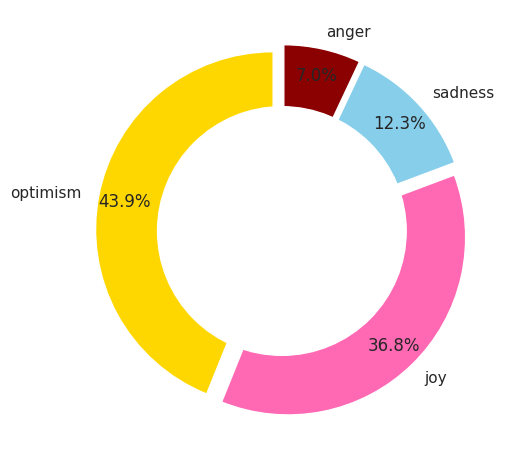

In [ ]:
# ------------------------------- DONE -------------------------------

# Explosion (a visual add-on for the piechart)
explode= [0.05] * len(ratios)

# Create the piechart using plotly pie()
plt.pie(ratios,
        colors = colors,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode = explode)


# Draw a circle in the middle of the piechart to create doughnut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

# Show the result
plt.show()

##### 2. Create wordclouds

For each of you semantic analysis result categories, we can create a wordcloud that will show an indication of the most commonly used words. This is one of the most basic methods of "topic" identification in text and should not be used to make definitive assumptions about the topics in the text, but it can nonetheless help get an idea of the most used words.

To create a wordcloud for each of your result categories, you will first need to create a subset (dataframe) for each of the categories. Again, you can do this using list comprehension e.g.:

```
category1 = whole_dataset[whole_dataset['column'] == 'value1']
category2 = whole_dataset[whole_dataset['column'] == 'value2']
...
 ```

The above code reads as: add all data to ```category1``` where the ```column``` in the ```whole_dataset``` has ```value1```

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create subests from your dataset accordinng to the labels from your analysis
category_optimism = filtered_gdf[filtered_gdf['semantic_analysis'] == 'optimism']
category_joy = filtered_gdf[filtered_gdf['semantic_analysis'] == 'joy']
category_sadness = filtered_gdf[filtered_gdf['semantic_analysis'] == 'sadness']
category_anger = filtered_gdf[filtered_gdf['semantic_analysis'] == 'anger']


You can then add each of the subsets to a list e.g. ```subsets = [category_x, category_y, category_z]```

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a list of your subset datasets
subsets = [category_optimism, category_joy, category_sadness, category_anger]

To give each wordcloud a <b>fitting color scheme</b> (e.g. if you have chosen sentiment analysis and one label is 'positive', you may want to choose a 'happy' color. Save the color names in a list (make sure you order the colors in the same order as you subsets list (above). Color schemes that are available can be viewed at https://matplotlib.org/1.2.1/mpl_examples/pylab_examples/show_colormaps.pdf

You should also create a list of the labels that will be shown above the wordclouds: e.g. ``` names = ['name1', 'name2', ...]```

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a list for the color schemes called 'cmap' for the wordclouds (in the same order as the list of subsets you created above)
cmap = ['Blues', 'Greens', 'Greys', 'Reds']

# Create a list for the current names of the df to be printed along with the wordclouds (also in the correct order)
names = ['Optimism', 'Joy', 'Sadness', 'Anger']



Now we will <b>exclude some words</b> from our wordclouds. Words that you'll typically not be interested in are "stop words". <b>Stop words</b> are a set of commonly used words in any language, such as “the”, “is” and “and”.

In the code cell below, a standard set of stop words from the python package 'wordcloud' is already being used. To see which words are included in the standard stopwords list, take a look here: https://github.com/amueller/word_cloud/blob/main/wordcloud/stopwords

You can also <b>add some of your own stop words</b> if you want to exclude some additional words from your word cloud.

An example is given in ```stopwords.update(['https', 't', 'co', 's']```
Here, we've added 'https', 't', 'co', 's' to the list of words to exclude. It means that links (https), the added ```t``` from words like ```didn't``` and the ```s``` from words like ```Jonathan's``` are excluded.

Feel free to add further words as you see appropriate (maybe some words that appear a lot in all of the categories)!

In [ ]:
# ------------------------------- TO DO -------------------------------

# DONE: the basic set of stop words from wordcloud
stopwords = set(STOPWORDS)

# DONE: Example of adding your own stop words
stopwords.update(['https', 't', 'co', 's', 'u','m,', 'oh'])

# TO DO: Add any further stop words you think are appropriate


Now we can print out the wordclouds. Below in the cell you'll see a loop that iteratively creates a wordcloud for each of your categories.



Optimism


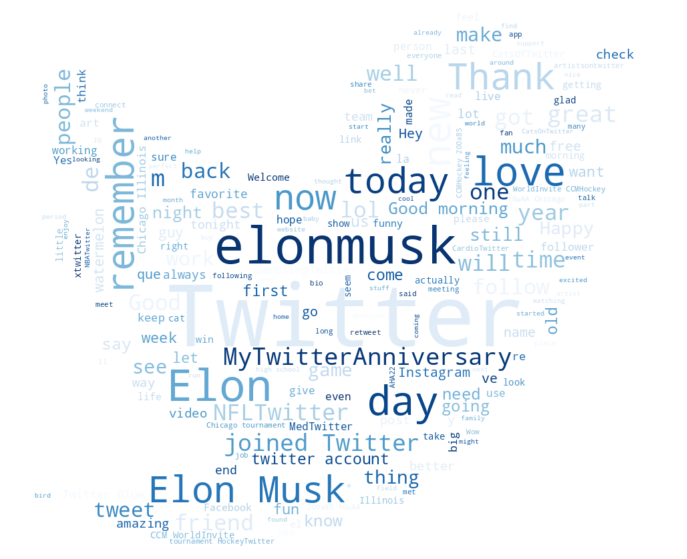

Joy


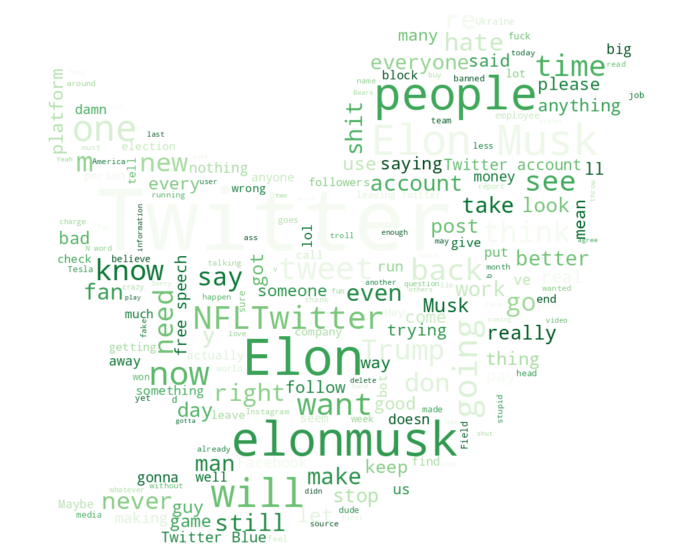

Sadness


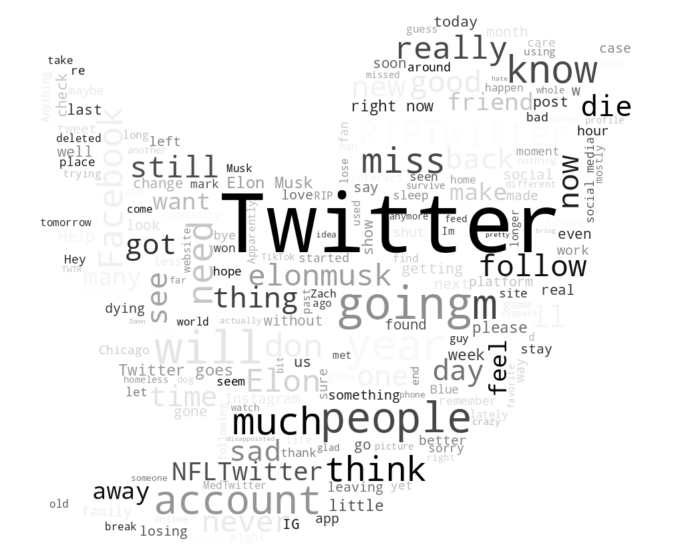

Anger


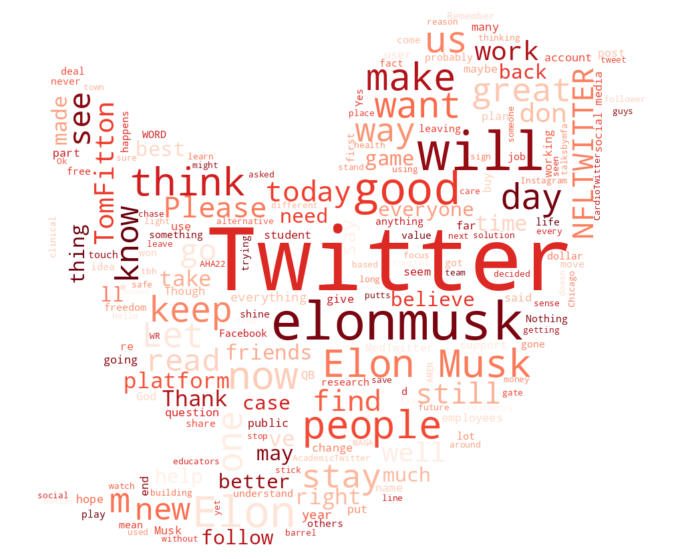

In [ ]:
# ------------------------------- DONE -------------------------------

# Format the wordclouds into a 'twitter logo' shape by using a PNG image of the logo
url = 'https://raw.githubusercontent.com/rasbt/datacollect/master/dataviz/twitter_cloud/twitter_mask.png'
response = requests.get(url)
mask = np.array(Image.open(BytesIO(response.content)))

# iterate over the cateogies to create and show a wordcloud
for i in range(len(subsets)):

    # show the name
    print(names[i])

    # define the text for the wordcloud
    text = " ".join(i for i in subsets[i].text)

    # create a wordcloud item using the wordcloud package
    wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color="white", colormap=cmap[i]).generate(text)

    # format the figure
    plt.figure( figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # show the wordcloud
    plt.show()

##### 3. Inspect the data geographically

Let's now inspect how the analysis results and our data look from a geographic perspective.

A good way of doing that is by creating a [```px.scatter_mapbox()```](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) which allows us to plot the data points and color them according to the analysis results from our semantic analysis.

To do that you will need to specify a few parameters (see the code cell below), the most important ones being:


*  <b> ```color```</b>: The column in your dataset by which the points should be colored (this is most likely going to be your analysis result column)
*  <b> ```color_discrete_map```</B>: This is your own definition of how the points should be colored. Here you specify which color should be connected to which value. For example, if you have the value "positive", "neutral" and "negative" then you can write something like this:
  * ```color_discrete_map = {"negative":"#E0340F", "neutral": "#FCF21E", "positive":"#58E230"} ```



In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a plotly mapbox scatter map
fig = px.scatter_mapbox(data_frame= filtered_gdf,             # TO DO: the dataset
                        lat='lat',             # TO DO: the column in the dataset indicating the latitude
                        lon='lon',             # TO DO: the column in the dataset indicating the longitude
                        color='semantic_analysis',             # TO DO: the column in the dataset by which the points should be colored
                        color_discrete_map = {"optimism":"#FFD700", "joy": "#FF8ACD", "sadness":"#87CEEB", "anger":"#700000"},             # TO DO: your own definition of how to color each label (see description above)
                        opacity = 0.5,                          # DONE: set opacity to 50% for some transparency of your point markers
                        center=dict(                            # TO DO: the lat and long coordinates that the map should center on
                                    lat=41,
                                    lon=-88
                                ),
                        zoom=5,             # TO DO: the initial zoom-level of the map (higher numbers = more zoomed in)
                        mapbox_style='carto-positron',             # TO DO: the style of the base map, e.g. 'carto-positron' (check documentation link above for all style options)
                        height=1000                                # TO DO: height of the map figure in pixels, e.g. 700
                        )
fig.show()


##### 4. Check the spatial distribution

Next up, let's take a look at the <b>spatial distribution of the dataset</b>. Sometimes it can happen that a lot of our data is grouped together in a small area (especially in large cities). This could be an important consideration in your later interpretation and discussion of your results.

In order to inspect how many points lie where, we can create a [```jointplot```](https://seaborn.pydata.org/generated/seaborn.jointplot.html) using the seaborn package and add a base map to it. Again, several parameters are required.

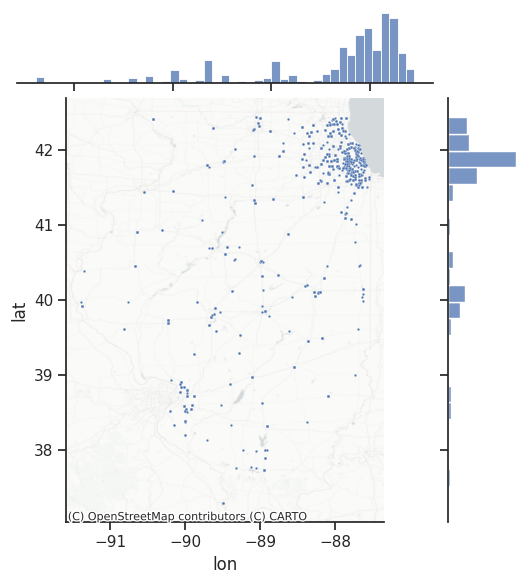

In [ ]:
# ------------------------------- TO DO -------------------------------

# Generate a jointplot with a base map to show spatial distribution
joint_axes = sns.jointplot(                                     # INFO: the joinplot function creates a figure that has multiple subplots
    x='lon',                                                # TO DO: specify the longitude column of the dataset
    y='lat',                                                # TO DO: specify the latitude column of the dataset
    data=filtered_gdf,                                                # TO DO: specify the dataset to be plotted
    s=3                                                          # TO DO: specify the size of the point markers (in numeric terms, e.g. 3)
)
contextily.add_basemap(                                         # INFO: this is a function for adding a basemap
    joint_axes.ax_joint,                                        # DONE: join the basemap with the plot
    crs="EPSG:4326",                                            # TO DO: specify the coordinate reference system (should be the same as your data)
    source=contextily.providers.CartoDB.PositronNoLabels,       # DONE: the style of the base map (but you can change it if you like)
);

<hr>
<br>

<b>Question:</b> Why might a dataset like ours show a large amount of points at ***exactly*** the same location (especially in a large city like New York City or LA)? Think specifically about how geolocation is added to social media data.

<br>

<b>Write your answer here:</b>
<font color=bad6bad> Well because there are more people in those areas, especially if we compare twitter users between urban and rural areas. Also, I belive users feel more comfortable to share their location in the big city, compared to if they are located in a smaller town. Also, in popular urban areas, many users may gather in the same places, such as landmarks, events, or popular venues, resulting in a high concentration of geotagged posts at those specific coordinates. Lastly, Social media platforms may apply geolocation data smoothing or privacy measures. These measures may deliberately change the exact location of the posts, leading to multiple posts appearing at an approximate location. </font>
<br>
<hr>
<br>

<b>Question:</b> Why could this be an issue in a geospatial analysis?

<br>

<b>Write your answer here:</b>
<font color=bad6bad> Well because then our data is biased, we cannot get correct results if our location is falsely clustered. It can falsley present the density, potentially downgrading the significance of certain areas. Also, it is not possible to do larger geographic scale analysis, but rather to concentrate on the city or municipality levels. </font>
<br>
<hr>

##### 5. Spatial Analysis

Now we are ready for a basic <b>spatial analysis</b>. There are many different approaches, packages, and methods available to you.

One option is to create <b>individual hotspot maps</b> for each of your analysis categories (e.g. positive, neutral, negative or topic related categories) and then to compare <b>the relative distribution</b> of each category. We will be using the seaborn [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) for this.

To do that, we will need to split our dataset into individual subsets according to each of your semantic analysis categories. This is the same step you performed to create wordclouds.

In [ ]:
# ------------------------------- TO DO -------------------------------

# Split the GeoDataFrame into subsets based on the 'semantic_analysis' column values
# ------------------------------- TO DO -------------------------------

# Create subests from your dataset accordinng to the labels from your analysis
category_optimism = filtered_gdf[filtered_gdf['semantic_analysis'] == 'optimism']
category_joy = filtered_gdf[filtered_gdf['semantic_analysis'] == 'joy']
category_sadness = filtered_gdf[filtered_gdf['semantic_analysis'] == 'sadness']
category_anger = filtered_gdf[filtered_gdf['semantic_analysis'] == 'anger']

Add all of your individual dataframes to a new list. Create another list with the titles for each map (in the correct order).

In [ ]:
# ------------------------------- TO DO -------------------------------

# Create a list of the subset datasets
datasets =  [category_optimism, category_joy, category_sadness, category_anger]

# Create a list of the titles for each map (in the correct order)
titles = ("Optimism", "Joy", "Sadness", "Anger")

Now let's <b>create the maps</b> with hotspots. You'll need to <b>parameterise</b> the ```kdeplot``` appropriately.

Try to adjust the parameter ```n_levels``` to get a meaningful result (showing differences). The ```n_levels``` parameter defines how many different levels of the hotspot map should be applied.

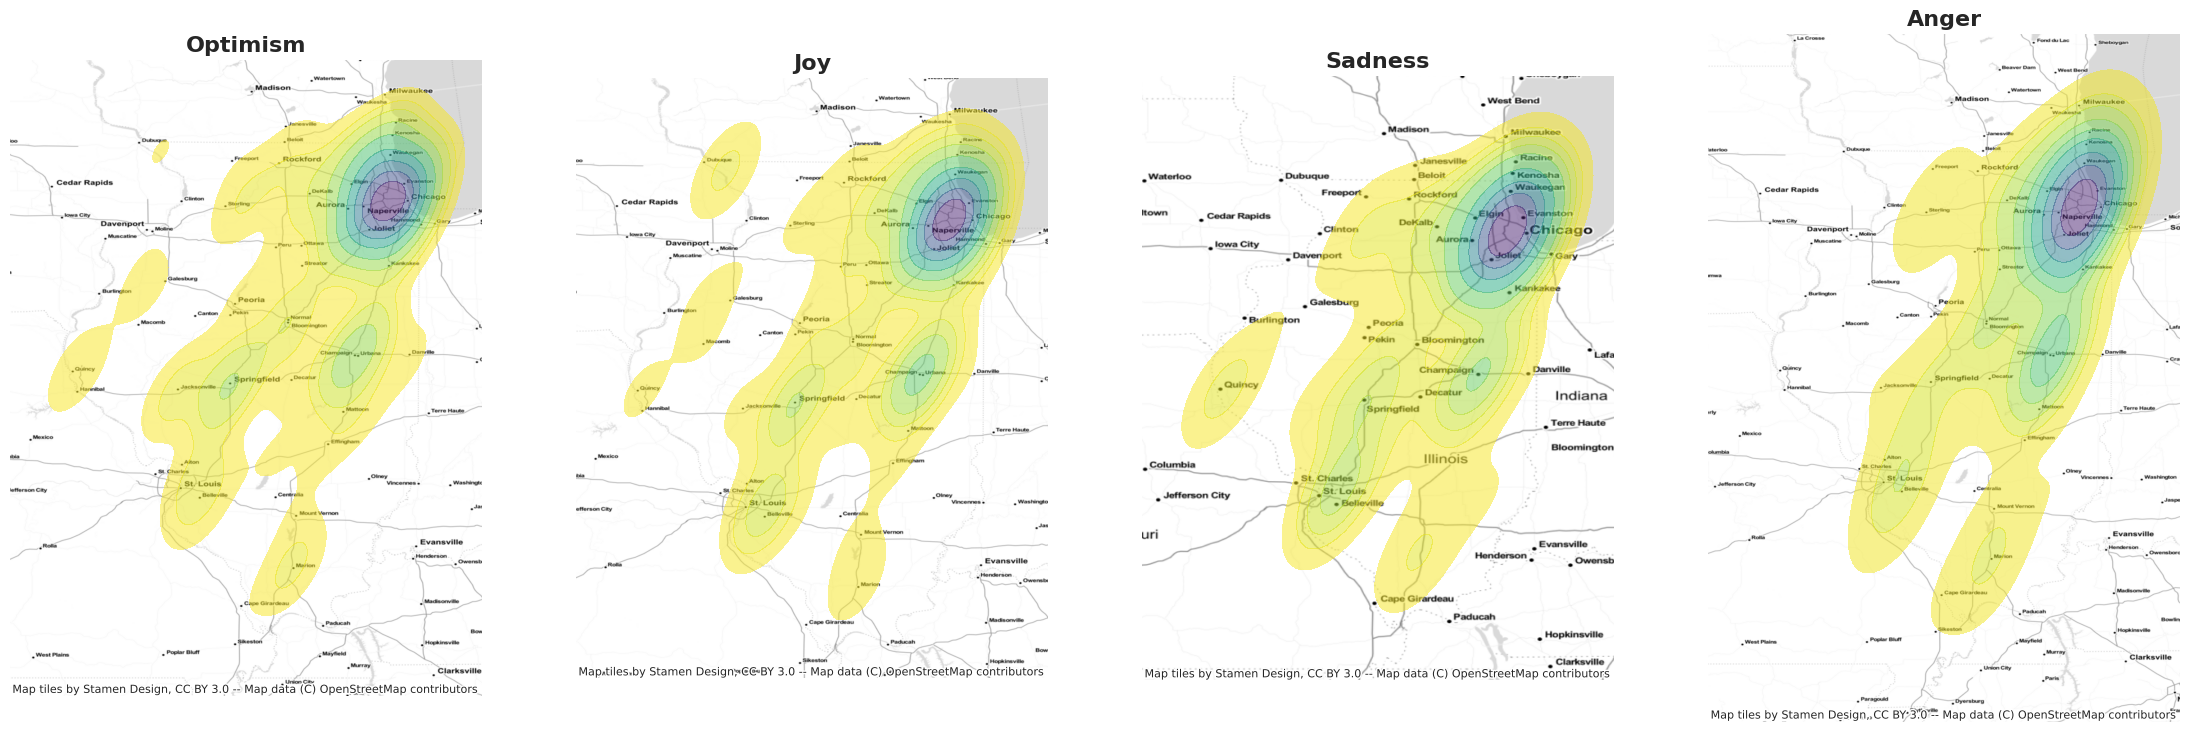

In [ ]:
# ------------------------------- TO DO -------------------------------

# TO DO: Specify the number how many maps you will create (i.e. the number of subsets you've created)
nr_of_maps =4

# DONE: Create a list of one's to make sure there's an equal size ratio between the maps
width_ratios = []
for i in range(nr_of_maps):
  width_ratios.append(1)

# DONE: Set up figure and axes
fig, axes = plt.subplots(1, nr_of_maps, figsize=(28, 13), gridspec_kw={'width_ratios': width_ratios})

# TO DO: Create hotspot maps for each dataset
for i, ax in enumerate(axes):
    sns.kdeplot(
        data=datasets[i],                 # DONE: Specify the current dataset to map
        x='lon',                 # TO DO: Specify the longitude columnn name
        y='lat',                 # TO DO: Specify the latitude column name
        n_levels=10,                 # TO DO: Specify how many different levels the hotspot map should show
        alpha=0.5,                 # TO DO: Set the transparency (between 0 and 1, e.g. 0.35)
        cmap="viridis_r",                 # TO DO: specify a color scheme (the standard is "viridis_r" but you can check for others here: https://r02b.github.io/seaborn_palettes/ )
        fill=True,                        # DONE: Set the fill to 'True'
        ax=ax                             # DONE: specify pre-exiting axes on which to plot the maps
    )
    # Add basemap
    contextily.add_basemap(
        ax,                               # DONE: Specify which axis to add the base map to
        crs="EPSG:4326",                 # TO DO: Specify the coordinate reference system (Same as your data)
        source=contextily.providers.Stamen.TonerLite     # Optional TO DO: Change the style of the base map (keep the "contextily.provider." part but change the "Stamen.TonerLite" so a different style from here: https://towardsdatascience.com/free-base-maps-for-static-maps-using-geopandas-and-contextily-cd4844ff82e1 )
    )
    # DONE: Remove axes
    ax.set_axis_off()
    # DONE: Add title
    ax.set_title(titles[i], fontsize=16, fontweight='bold')

# DONE: Display the figures
plt.show()

# DONE: Save the figures (you can adjust these settings)
fig.savefig('hotspot_maps.png', dpi=300, bbox_inches='tight')


##### 6. (Optional!) Create a further map or plot showing your analysis results

In this final coding step, you are asked to <b>create one more map or plot</b> showing your anlaysis in some <b>meaningful</b> way. Here, you have complete decision-making freedom (what to show, how to create a map, etc). You could use an analysis method that you learned about in the other lessons such as a time series plot or an additional topic analysis plot (if you think they are fitting for your case). If you want to create a map output you could use the [folium](https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94) package, or [plotly scatter mapbox](https://plotly.com/python/scattermapbox/), both of which have been used in this notebook already. Or you could opt for something entirely new. You are encouraged to browse the internet for methods! Keep in mind thaty you may need to do a few steps to get your desired result. If you need any assistance, you are welcome to get in touch with Christina.

Please make sure to <b>add a markdown cell</b> with a description of what your map shows and why you chose the format you worked with!

In [ ]:
print(filtered_gdf)

## <font color-bad6bad> Daily Tweets by Category </font>

This map shows the count of each category by each day covered in the dataset. The justification was to identify any potentially important days within the context of the Elon Musk takeover. This allows for another angle of contextualization in addition to the geographic and linguistic visualizations we have done previously.

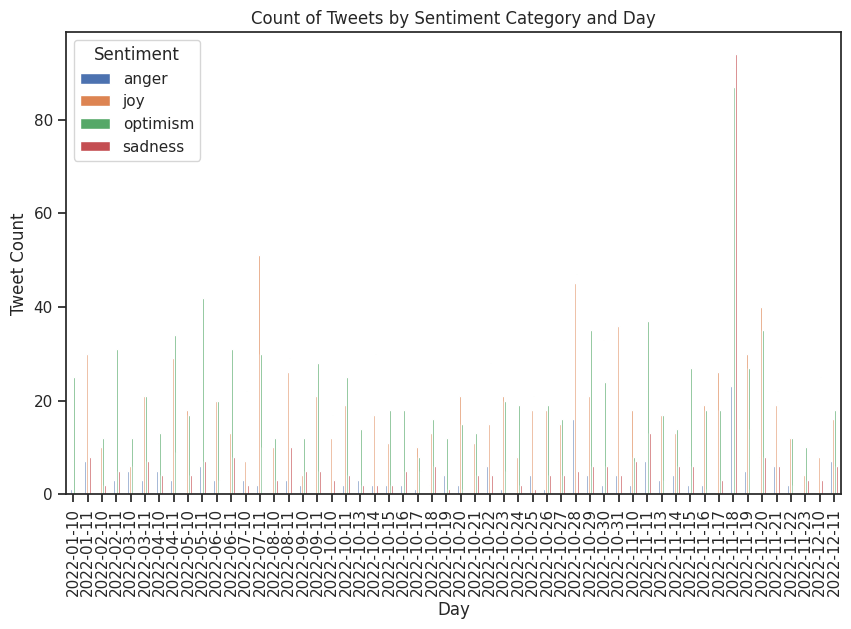

In [ ]:
# ------------------------------- TO DO -------------------------------

# Add your code for a new map here
# Group the data by date and sentiment category, and calculate the count of tweets in each category for each date
import matplotlib.pyplot as plt

# Extract the day from the 'date' column
filtered_gdf['day'] = pd.to_datetime(filtered_gdf['date']).dt.date

# Group the data by day and sentiment category, and calculate the count of tweets in each category for each day
sentiment_counts = filtered_gdf.groupby(['day', 'semantic_analysis']).size().unstack()

# Plot the grouped bar chart
sentiment_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

# Customize the plot
plt.title("Count of Tweets by Sentiment Category and Day")
plt.xlabel("Day")
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")

# Show the plot
plt.show()

## <font color=bad6bad> Tweet Clusters by Category </font>
The map employs marker clustering to efficiently display a large number of markers in a visually appealing manner. This helps prevent marker overcrowding, especially in areas with a high concentration of tweets. The use of marker clusters allows you to see the overall sentiment patterns at different zoom levels and easily identify areas with a higher density of tweets.

Another important aspect is the way our data is fetched. As many tweets have the exact same location, this map helps us visualise and understand server response in a better way.



In [ ]:
# ------------------------------- TO DO -------------------------------

# Add your code for a new map here
from datetime import datetime
from folium.plugins import MarkerCluster

def get_sentiment_color(sentiment):
    if sentiment == 'optimism':
        return 'yellow'
    elif sentiment == 'joy':
        return 'pink'
    elif sentiment == 'sadness':
        return 'lightblue'
    elif sentiment == 'anger':
        return 'red'
    else:
        return 'black'  # Default color for unknown sentiment

# Define the latitude and longitude of the center point for your map
latitude = 41.8781
longitude = -87.6298
# Create a base map centered on a specific location

map = folium.Map(location=[latitude, longitude], zoom_start=7)

# Create separate marker clusters for each sentiment category
sentiment_clusters = {}  # Dictionary to store marker clusters by sentiment

# Iterate over each tweet in the dataset
for index, row in filtered_gdf.iterrows():
    # Get the tweet location, sentiment, and date
    lat = row['lat']
    lon = row['lon']
    sentiment = row['semantic_analysis']
    #text = row['text']

    # Check if a marker cluster for the sentiment already exists
    if sentiment not in sentiment_clusters:
        sentiment_clusters[sentiment] = MarkerCluster().add_to(map)

    # Create a marker for each tweet with color based on sentiment
    marker = folium.Marker([lat, lon],
                           icon=folium.Icon(color=get_sentiment_color(sentiment)),
                           popup=f"Sentiment: {sentiment}")
    marker.add_to(sentiment_clusters[sentiment])

# Display the map
map



<ipython-input-104-5fd4c47a5b71>:43: UserWarning:

color argument of Icon should be one of: {'pink', 'darkblue', 'darkgreen', 'black', 'green', 'purple', 'darkred', 'blue', 'lightgreen', 'beige', 'orange', 'red', 'white', 'gray', 'darkpurple', 'lightblue', 'cadetblue', 'lightgray', 'lightred'}.



In [ ]:
from folium.plugins import TimestampedGeoJson

# Create a base map centered on a specific location
latitude = 41.8781
longitude = -87.6298
map = folium.Map(location=[latitude, longitude], zoom_start=5)

# Create a GeoJSON data structure for the time series data
geojson = {
    'type': 'FeatureCollection',
    'features': []
}

# Iterate over each tweet in the dataset
for index, row in filtered_gdf.iterrows():
    # Get the tweet location, sentiment, and date
    lat = row['lat']
    lon = row['lon']
    sentiment = row['semantic_analysis']
    date = row['date']

    # Create a GeoJSON feature for each tweet
    feature = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [lon, lat]
        },
        'properties': {
            'sentiment': sentiment,
            'time': date  # Use 'time' instead of 'date' as the property name
        }
    }
    geojson['features'].append(feature)

# Create a TimestampedGeoJson layer with the GeoJSON data
TimestampedGeoJson(geojson).add_to(map)

# Display the map with the time series data
map

<b>TO DO</b>: Add your description here:

<br>

### Task 4: Interpret the Results

To wrap up the assignment, you are asked to <b>discuss and interpret</b> the results that you have accumulated in this notebook. Conclude your interpretation with a clear statement of what your results show with regards to the twitter takeover by Elon Musk.

You should also <b>reflect on the quality of the analysis results</b> that you were able to generate with your chosen model from the Hugging Face platform. Answer questions like:
- How can you check and assess the quality of the results (perhaps you could add a code cell in this discussion part that shows some example results?)?
- What is your assessment of the suitability of the model for your task?

Remember to keep a critical stance!
Think also about <b>how your workflow can be regarded as useful</b>, in which aspects we may need to be <b>careful with interpretation</b>, and so on. Structure this part with the use of headings (you can create headings in markdown cells using hashtags).

You are encouraged to add several Jupyter Notebook elements here, such as:
- markdown cells for written text or images
- code cells for displaying figures or demonstrating any additional analyses



<hr>

<br>


<b>[add your own discussion and interpretation here]</b>

## <font color=bad6bad> Restatement of Project Goals </font>

 In this CoLab we perofrm a semantic analysis on a subset of twitter data within the state of Illinois relating to the twitter takeover by Elon Musk. The choice of Illinois was in part because it is Christina's (the American one, not the one grading this) home state, but also because of the interesting phenomena where a large majority of Illinois population is concentrated at Chicago. This creates a sort of progressive, left-leaning bubble that is very dense population wise, but geographically the majority of the state is "red" or right-leaning.

The analysis was performed using the [Twitter Roberta Base Emotion model](https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion) that categorized the tweets into four emotions: Joy, Optomism, Sadness or Anger. TThis interperetation will be divided into


## <font color=bad6bad> Statistical Interperetation </font>

Before visualizing the reuslts, we can first look at the statistics of the output data. The first point of interest is just the raw number of each category;

In [ ]:
print(value_counts)

optimism    1247
joy         1046
sadness      349
anger        199
Name: semantic_analysis, dtype: int64


As we can see, the results are overwhelmingly positive. We can check if this correlates with the original sentiment attatched to the data we originally recieved:

In [ ]:
filtered_gdf['sentiment'].value_counts()

neutral     1133
negative     885
positive     823
Name: sentiment, dtype: int64

The original sentiment analysis that came with the data allowed for a 'neutral' category, which seems more intuitive about the reality of the data (i.e., most tweets don't display strong emotions such as joy or anger).

Hoever, we chose to keep the scores of each label in the dataframe expressly for the reason of assessing how certain the model was in each of these labels. If the majority of the optomism tweets have a score of less than, say, 0.75, then we can reasonably assume that there is more neutrality being captured than what is represented by these static labels.

To asses this, let's somewhat arbitrarily decide some thresholds. Let's say that a label with a score >0.9 is very confident (e.g., the tweet is very certainly optomistic). We'll be picky, so between 0.9-0.75 we can say is somewhat confident. 0.75-0.5 we could call not very confident, and less than 0.5 we'll go ahead and say is a decidedly neutral tweet, i.e., the model isn't confident enough to classify it as one of the categories.

In [ ]:
count_somewhat = len(filtered_gdf.loc[filtered_gdf['semantic_analysis_score']<0.9])
count_not_very = len(filtered_gdf.loc[filtered_gdf['semantic_analysis_score']<0.75])
count_neutral = len(filtered_gdf.loc[filtered_gdf['semantic_analysis_score']<0.50])

total = len(filtered_gdf)

print(f"{count_somewhat}  or {count_somewhat/total}% tweets are less than 0.9")
print(f"{count_not_very}  or {count_not_very/total}% tweets are less than 0.75")
print(f"{count_neutral}  or {count_neutral/total}% tweets more likely belong to a 'neutral' classification category")

1910  or 0.6722984864484336% tweets are less than 0.9
1223  or 0.4304822245688138% tweets are less than 0.75
399  or 0.14044350580781415% tweets more likely belong to a 'neutral' classification category


So 43% of our dataset is not so confidently optomistic, joyful, angry or sad as it may seem. This is an important caveat to take into account especially for a model that is forcing these categories that represent pretty strong emotions.

# <font color=bad6bad> Visual Interperetation </font>

The most striking output of the visual interperetation is the same issue that we alluded to earlier-- the presence of Chicago. This comes up in almost all of the geographic maps we look at, especially the **spatial distribution** map, however we'll address some of the other key figures here.

### <font color=bad6bad> Word Cloud </font>

In all of the word cloud graphs, the keywords of the dataset tended to be the prominent words, i.e., some variant of twitter and elon musk. The optomistic word cloud seems to have the most diverse set of words. What's interesting however, is that in both the negative categories (anger, sadness) "Twitter" is the most promonent word. In Anger specifically, "Elon" is also significant in a way that it is not in sadness.  This icould indicate that a topic-based classification model would be a good fit in addition to the emotion model, as perhaps there is more animosity towards the twitter/elon issue than is being shown by our model due to a bunch of noise (i.e. non-relevant tweets) that are skewing the positive values.

### <font color=bad6bad> Hot Spot </font>
As mentioned, the hot spot graphs skew heavily towards Chicago, as well as some other high population areas like Champaign and Springfield. It seems like the anger category is slightly less concentrated than the other categories, shown by the area between Chicago and Champaign. This could corroborate with the previous theory that the optmistic tweets capture more noise -- highly populated areas are more likely to have more tweets, period. Thus this could also be a testament to a spike in animosity towards twitter/Elon Musk in the sense that the presence of angry tweets in this area is not simply attributable to the presence of general tweeting activity in this area, in the way that it is for the positive categories.

### <font color=bad6bad> Tweets Per Day </font>
The notable part of this graph is the huge spike in tweets on November 18, 2022. From what we could gather, our best guess is that this day corresponds to [a mass exodus of twitter employees after an ultimatum imposed by elon musk.](https://www.nytimes.com/2022/11/18/technology/elon-musk-twitter-workers-quit.html).



#<font color=bad6bad> Quality Assessment </font>

While we have already performed several small QA checks in this interpertation such as comparing our results to the original sentiment analysis and corroborating the results against real world events, another quick and easy way is to manually interperet the tweets and compare our (arguably superior) human interperetation to the sentiment analysis results.

In [ ]:
#let's get only the relevant rows
pd.set_option('display.max_colwidth', 0)

df = filtered_gdf[["text", "sentiment", "semantic_analysis", "semantic_analysis_score"]]

#every time we run this, .sample() will pull a new result that is 1/10th o the dataframe
df.sample(10)

text  \
1315  @MattBrownCFB Twitter needs a dvr function                                                                                                                                                                                                       
850   despite how many times i've met you in person i'm still convinced my uiuc mutuals are just twitter bots                                                                                                                                          
1215  @izzypriortalks This is why Ive had Twitter Blue for months (pre-Elon). \n\nWay too many mistakes on the type it out now and post it tweets.                                                                                                  
755   - Good night, Twitter. Xo?? https://t.co/g00Mqn5RKg                                                                                                                                                                                              
2804  @proof_xyz - @WhiteHouse and @NSA_CSDirector @NSACyber @NSAOIG @NSAGov - @Snowden @MetaQuestVR @GoogleAI @forethought_ai @Cortana @TwitterChicago @Twitch @Tesla @Dodge @ltaford ? ? ? ? - @mishacollins @fitness_nala https://t.co/48u9fFoSXx   
1716  #REDBIRDtwitter- Who is going to the #REDBIRDhoops game at UIC on 12/28 and where are you sitting? I called the Redbird ticket office and they related that they do not have any tickets for this game available.                                
1807  @elonmusk hey Elon, I would like to talk about your cars extended warranty                                                                                                                                                                      
2505  @ChazMinCA2 @JoJoFromJerz @CalltoActivism And just because there is a pic of them being in the same room does not mean Elon had any involvement. Elites are often in the same room together. Spreading BS propaganda is ridiculous.              
2504  @E4Echelon Facts                                                                                                                                                                                                                                 
1779  @CaseyNewton ?????? tell the folks at Twitter, particularly the head Twit to go F themselves                                                                                                                                                     

     sentiment semantic_analysis  semantic_analysis_score  
1315  neutral   joy               0.674676                 
850   negative  joy               0.728320                 
1215  negative  joy               0.502754                 
755   positive  optimism          0.875889                 
2804  neutral   optimism          0.397234                 
1716  neutral   joy               0.771997                 
1807  neutral   optimism          0.308482                 
2505  negative  joy               0.972477                 
2504  neutral   optimism          0.414284                 
1779  negative  joy               0.979022

This sample tells us that our model did a pretty poor job compared to at least our human interperetation. Let's take for example the tweet at index 1779: *@CaseyNewton ?????? tell the folks at Twitter, particularly the head Twit to go F themselves*

This is a pretty clearly negative tweet, but the model classifies it as joyful, and it fact it does so with a score of 0.97!!

As such, we are not super happy with the results of the model. There's lots of reasons this model could have performed this way. In our example tweek, the language "go F yourself" requires a lot of intuition to understand the meaning behind it. It's not as simple as just telling the model that "F" is always an allusion to the word "fuck", because then any lone F could be misinterpereted. And even if we did try and train the model specifically to undestand the use of F in this context, how many other special cases might there be that the model would have to be trained on? And more importantly, how much extra time, energy, power and computational cost would have to be dedicated to this task?

In summary, whil we do not find this model very will equipped for the task of identifying sentiment towards the Elon Musk twitter take over within the state of Illinois, we are also cognizant of all of the limitations that contribute to this models performance.





### Task 5. Submission

Lastly, you need to submit your work!

<br>

Make sure you regularly <b>save all your changes</b> to this notebook (so that all of your added code is saved). You may want to do a <b>final run-through</b> of the whole notebook before you submit it to make sure the all of your code works.

<br>

When you're satisfied with your code in this notebook, <b>download</b> it as a jupyter notebook (Go to ```file``` > ```download``` > ```Download .ipynb```).

<br>

This will be the file you will <b>upload to blackboard</b> for submission. You do not need to upload any other files. In the submission, please write down any comments about your work and a <b>brief description of who did which parts</b> of the assignment!